<a href="https://colab.research.google.com/github/Hasnatmn/Tourism-Project/blob/main/Tourism_Experience_Analytics_Classification%2C_Prediction_and_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tourism Experience Analytics: Classification, Prediction, and Recommendation System**



## PROJECT SUMMARY

In this project, I built a travel attraction analytics and recommendation system using nine datasets. I started by cleaning the data, handling missing values, removing duplicates, fixing data types, and standardizing columns. Then, I merged all datasets using UserId and AttractionId to create one complete dataset containing user, attraction, and visit information.

Next, I performed exploratory data analysis (EDA) to understand rating patterns, attraction performance, and city trends. I built regression models (Linear Regression and Random Forest) to predict user ratings and evaluated them using MAE, RMSE, and R². I also built classification models (Logistic Regression and Random Forest) to predict visit mode, where Random Forest performed better.

Finally, I developed a collaborative filtering recommendation system using cosine similarity to recommend attractions based on similar users. The system provides personalized recommendations with details like attraction name, address, type, city, and country, completing the full data science workflow.


## Problem Statement:


Tourism agencies and travel platforms aim to enhance user experiences by leveraging data to provide personalized recommendations, predict user satisfaction, and classify potential user behavior. This project involves analyzing user preferences, travel patterns, and attraction features to achieve three primary objectives: regression, classification, and recommendation.


# Loading all the datasets

In [1]:
import pandas as pd

transaction = pd.read_excel("Transaction.xlsx")
user = pd.read_excel("User.xlsx")
city = pd.read_excel("City.xlsx")
continent = pd.read_excel("Continent.xlsx")
country = pd.read_excel("Country.xlsx")
item = pd.read_excel("Item.xlsx")
visit_mode = pd.read_excel("Mode.xlsx")
region = pd.read_excel("Region.xlsx")
type_df = pd.read_excel("Type.xlsx")

# Data Overview

In [2]:
datasets = {
    "transaction": transaction,
    "user":user,
    "item":item,
    "city":city,
    "continent":continent,
    "country":country,
    "visit_mode":visit_mode,
    "region":region,
    "type_df":type_df
}

for name, df in datasets.items():
  print(f"\n{name.upper()}")
  print("shape:",df.shape)
  print("columns:",df.columns)
  print("First Few value:\n",df.head())
  print("Null values:\n",df.isnull().sum())
  print("Info:\n",df.info())


TRANSACTION
shape: (52930, 7)
columns: Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating'],
      dtype='object')
First Few value:
    TransactionId  UserId  VisitYear  VisitMonth  VisitMode  AttractionId  \
0              3   70456       2022          10          2           640   
1              8    7567       2022          10          4           640   
2              9   79069       2022          10          3           640   
3             10   31019       2022          10          3           640   
4             15   43611       2022          10          2           640   

   Rating  
0       5  
1       5  
2       5  
3       3  
4       3  
Null values:
 TransactionId    0
UserId           0
VisitYear        0
VisitMonth       0
VisitMode        0
AttractionId     0
Rating           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 7 columns):
 #   Column    

In [3]:
#handling missing values
user = user.dropna(subset=['CityId'])
city = city.dropna(subset=['CityName'])




As the number of missing records was very small relative to dataset size:

Rows containing missing values were removed using dropna().



In [4]:
for name, df in datasets.items():
  print(f"Duplicated {name.upper()}",df.duplicated().sum())

Duplicated TRANSACTION 0
Duplicated USER 0
Duplicated ITEM 0
Duplicated CITY 0
Duplicated CONTINENT 0
Duplicated COUNTRY 0
Duplicated VISIT_MODE 0
Duplicated REGION 0
Duplicated TYPE_DF 0




*   Missing values were removed
*  No duplicate columns were found.










In [5]:
#Data Type Verification

In [6]:
#Data Type Verification

print(transaction.dtypes)
print(user.dtypes)
print(item.dtypes)
print(type_df.dtypes)
print(city.dtypes)
print(country.dtypes)
print(region.dtypes)
print(continent.dtypes)
print(visit_mode.dtypes)

TransactionId    int64
UserId           int64
VisitYear        int64
VisitMonth       int64
VisitMode        int64
AttractionId     int64
Rating           int64
dtype: object
UserId           int64
ContinentId      int64
RegionId         int64
CountryId        int64
CityId         float64
dtype: object
AttractionId          int64
AttractionCityId      int64
AttractionTypeId      int64
Attraction           object
AttractionAddress    object
dtype: object
AttractionTypeId     int64
AttractionType      object
dtype: object
CityId        int64
CityName     object
CountryId     int64
dtype: object
CountryId     int64
Country      object
RegionId      int64
dtype: object
Region         object
RegionId        int64
ContinentId     int64
dtype: object
ContinentId     int64
Continent      object
dtype: object
VisitModeId     int64
VisitMode      object
dtype: object


In [7]:
# converting CityId data type to int form
user['CityId'] = user['CityId'].astype(int)

/tmp/ipython-input-3976459547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user['CityId'] = user['CityId'].astype(int)


In [8]:
print(user['CityId'].dtype)

int64


All datasets were verified to ensure correct data types.

Issue identified:
CityId in the User dataset was stored as float64 because of earlier missing values.

Solution applied:
After removing the missing values, CityId was converted to int to ensure proper matching and smooth merging with other datasets.

In [9]:
#Clean Text Categories
def clean_text_column(df, column):
  df[column]=(
      df[column].astype(str).str.strip().str.lower().str.replace(r'\s+',' ',regex=True)
  )

  return df

In [10]:
#Apply to Each Dataset
item=clean_text_column(item,'Attraction')
item=clean_text_column(item,'AttractionAddress')

typr_df=clean_text_column(type_df,'AttractionType')
city=clean_text_column(city,'CityName')
country=clean_text_column(country,'Country')
continent=clean_text_column(continent,'Continent')
region=clean_text_column(region,'Region')
visit_mode=clean_text_column(visit_mode,'VisitMode')


/tmp/ipython-input-913961676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=(


In [11]:
# Start with transaction table
df = transaction.copy()

# 1️ Merge User Data
df = df.merge(user, on='UserId', how='left')

# Rename user location columns for clarity
df.rename(columns={
    'CityId': 'UserCityId',
    'CountryId': 'UserCountryId',
    'RegionId': 'UserRegionId',
    'ContinentId': 'UserContinentId'
}, inplace=True)

# Merge Item Data
df = df.merge(item, on='AttractionId', how='left')

# Rename Item columns
df.rename(columns={
    'AttractionCityId': 'item_AttractionCityId',
    'Attraction':'item_Attraction',
    'AttractionAddress': 'item_AttractionAddress'
  }, inplace=True)

# Merge Attraction Type
df = df.merge(type_df, on='AttractionTypeId', how='left')

# Rename type columns
df.rename(columns={
    'AttractionType': 'type_df_AttractionType'},inplace=True)

#  Merge Attraction City
df = df.merge(city, left_on='item_AttractionCityId', right_on='CityId', how='left')

# Rename city-related columns
df.rename(columns={
    'CityName': 'city_CityName',
    'CountryId': 'city_CountryId'
}, inplace=True)

# Drop duplicate CityId column (already represented by item_AttractionCityId)
df.drop(columns=['CityId'], inplace=True)

#  Merge Country (Attraction Country)
df = df.merge(country,left_on='city_CountryId',right_on='CountryId',how='left')


# Rename country-related columns
df.rename(columns={
    'Country': 'country_CountryName',
    'RegionId': 'country_RegionId'
}, inplace=True)

# Drop redundant CountryId
df.drop(columns=['CountryId'], inplace=True)

#  Merge Region (Attraction Region)
df = df.merge(region,left_on='country_RegionId',right_on='RegionId',how='left')

# Rename region-related columns
df.rename(columns={
    'Region': 'region_RegionName',
    'ContinentId': 'region_ContinentId'
}, inplace=True)

# Drop redundant RegionId
df.drop(columns=['RegionId'], inplace=True)

#  Merge Continent (Attraction Continent)
df = df.merge(continent,left_on='region_ContinentId',right_on='ContinentId',how='left')

# Rename continent column
df.rename(columns={
    'Continent': 'continent_ContinentName'
}, inplace=True)

# Drop redundant ContinentId
df.drop(columns=['ContinentId'], inplace=True)



In [12]:
print("Final Shape:", df.shape)
print("\nColumns:\n", df.columns)

Final Shape: (52930, 23)

Columns:
 Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating', 'UserContinentId', 'UserRegionId',
       'UserCountryId', 'UserCityId', 'item_AttractionCityId',
       'AttractionTypeId', 'item_Attraction', 'item_AttractionAddress',
       'type_df_AttractionType', 'city_CityName', 'city_CountryId',
       'country_CountryName', 'country_RegionId', 'region_RegionName',
       'region_ContinentId', 'continent_ContinentName'],
      dtype='object')


In [13]:
df = df.dropna(subset=['UserCityId'])
df = df.dropna(subset=['UserContinentId'])
df = df.dropna(subset=['UserCountryId'])
df = df.dropna(subset=['UserRegionId'])

In [14]:
df[['UserContinentId','UserRegionId','UserCountryId','UserCityId']].dtypes


,0
UserContinentId,float64
UserRegionId,float64
UserCountryId,float64
UserCityId,float64


In [15]:
df['UserCityId'] = df['UserCityId'].astype(int)
df['UserCountryId'] = df['UserCountryId'].astype(int)
df['UserRegionId'] = df['UserRegionId'].astype(int)
df['UserContinentId'] = df['UserContinentId'].astype(int)


In [16]:
print(df.isnull().sum())

TransactionId              0
UserId                     0
VisitYear                  0
VisitMonth                 0
VisitMode                  0
AttractionId               0
Rating                     0
UserContinentId            0
UserRegionId               0
UserCountryId              0
UserCityId                 0
item_AttractionCityId      0
AttractionTypeId           0
item_Attraction            0
item_AttractionAddress     0
type_df_AttractionType     0
city_CityName              0
city_CountryId             0
country_CountryName        0
country_RegionId           0
region_RegionName          0
region_ContinentId         0
continent_ContinentName    0
dtype: int64


In [17]:
df.shape

(52922, 23)

After loadeding all the datasets i checked for missing values, and data types. A few missing rows in the User related  datasets were removed, and data types were corrected. Then, I merged the datasets step by step, starting with the Transaction table and adding User, Attraction, City, Country, Region, and Continent tables using left joins. After cleaning, the final dataset has 52,922 rows and 23 columns with no missing values and no duplicate values.

## Final Dataset Overview

In [18]:
df.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,UserContinentId,UserRegionId,UserCountryId,...,item_Attraction,item_AttractionAddress,type_df_AttractionType,city_CityName,city_CountryId,country_CountryName,country_RegionId,region_RegionName,region_ContinentId,continent_ContinentName
0,3,70456,2022,10,2,640,5,5,21,163,...,sacred monkey forest sanctuary,"jl. monkey forest, ubud 80571 indonesia",nature & wildlife areas,douala,1,cameroon,1,central africa,1,africa
1,8,7567,2022,10,4,640,5,2,8,48,...,sacred monkey forest sanctuary,"jl. monkey forest, ubud 80571 indonesia",nature & wildlife areas,douala,1,cameroon,1,central africa,1,africa
2,9,79069,2022,10,3,640,5,2,9,54,...,sacred monkey forest sanctuary,"jl. monkey forest, ubud 80571 indonesia",nature & wildlife areas,douala,1,cameroon,1,central africa,1,africa
3,10,31019,2022,10,3,640,3,5,17,135,...,sacred monkey forest sanctuary,"jl. monkey forest, ubud 80571 indonesia",nature & wildlife areas,douala,1,cameroon,1,central africa,1,africa
4,15,43611,2022,10,2,640,3,5,21,163,...,sacred monkey forest sanctuary,"jl. monkey forest, ubud 80571 indonesia",nature & wildlife areas,douala,1,cameroon,1,central africa,1,africa


In [19]:
# dataset rows and columns
print('rows:',df.shape[0])
print('columns:',df.shape[1])

rows: 52922
columns: 23


In [20]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52922 entries, 0 to 52929
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   TransactionId            52922 non-null  int64 
 1   UserId                   52922 non-null  int64 
 2   VisitYear                52922 non-null  int64 
 3   VisitMonth               52922 non-null  int64 
 4   VisitMode                52922 non-null  int64 
 5   AttractionId             52922 non-null  int64 
 6   Rating                   52922 non-null  int64 
 7   UserContinentId          52922 non-null  int64 
 8   UserRegionId             52922 non-null  int64 
 9   UserCountryId            52922 non-null  int64 
 10  UserCityId               52922 non-null  int64 
 11  item_AttractionCityId    52922 non-null  int64 
 12  AttractionTypeId         52922 non-null  int64 
 13  item_Attraction          52922 non-null  object
 14  item_AttractionAddress   52922 non-null  ob

In [21]:
#checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [22]:
#checking for null values
df.isnull().sum()

,0
TransactionId,0
UserId,0
VisitYear,0
VisitMonth,0
VisitMode,0
AttractionId,0
Rating,0
UserContinentId,0
UserRegionId,0
UserCountryId,0


# EDA

## Understanding Variables

In [23]:
#dataset columns
df.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating', 'UserContinentId', 'UserRegionId',
       'UserCountryId', 'UserCityId', 'item_AttractionCityId',
       'AttractionTypeId', 'item_Attraction', 'item_AttractionAddress',
       'type_df_AttractionType', 'city_CityName', 'city_CountryId',
       'country_CountryName', 'country_RegionId', 'region_RegionName',
       'region_ContinentId', 'continent_ContinentName'],
      dtype='object')

In [24]:
 #describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionId,52922.0,70418.108783,66303.526122,3.0,19645.25,42770.5,105640.75,211241.0
UserId,52922.0,45025.888364,25072.959559,14.0,23470.00,45533.5,66670.25,88190.0
VisitYear,52922.0,2016.351971,1.732955,2013.0,2015.00,2016.0,2018.00,2022.0
VisitMonth,52922.0,6.632497,3.392764,1.0,4.00,7.0,9.00,12.0
VisitMode,52922.0,2.945713,1.000643,1.0,2.00,3.0,4.00,5.0
AttractionId,52922.0,759.672272,210.730158,369.0,640.00,737.0,841.00,1297.0
Rating,52922.0,4.157609,0.970575,1.0,4.00,4.0,5.00,5.0
UserContinentId,52922.0,3.592816,1.075385,1.0,3.00,4.0,5.00,5.0
UserRegionId,52922.0,14.524470,4.186383,0.0,13.00,15.0,17.00,21.0
UserCountryId,52922.0,106.297589,35.736586,1.0,93.00,109.0,121.00,164.0


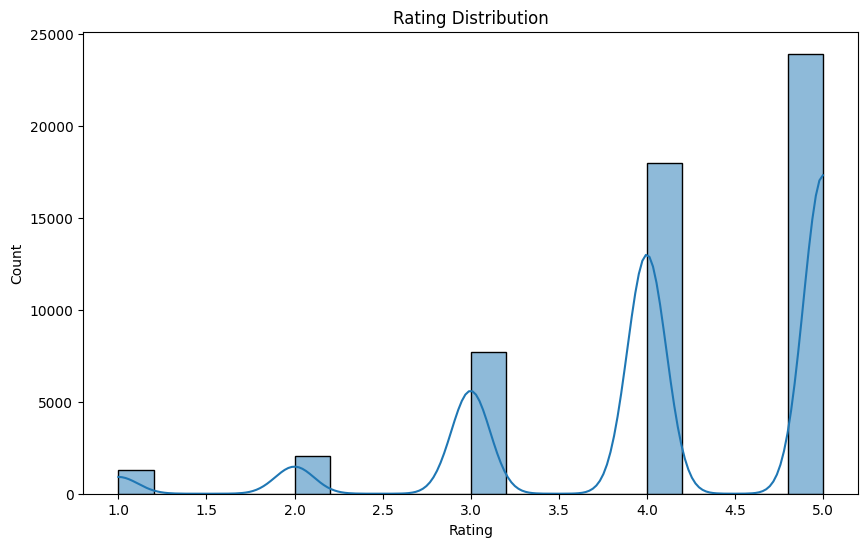

In [25]:
#chart-1
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'],bins=20,kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.show()

1. Why did you pick the specific chart?

Histogram is used to understand distribution, Shape (normal, skewed, etc.), and Concentration of values.

Since Rating is numeric (1–5), histogram helps see how values are spread.

2. What is/are the insight(s) found from the chart?

From the observation:

*   Most ratings are 4 and 5
*   Very few 1 and 2

Distribution is left-skewed (tail toward lower ratings)

This tells us:

Customers are generally satisfied

 Negative experiences are rare





3. Will the gained insights help creating any business impact?



*  Marketing can highlight “Highly Rated Experiences”
* High overall satisfaction = strong brand reputation

*   Low number of 1–2 ratings = identify what causes dissatisfaction.



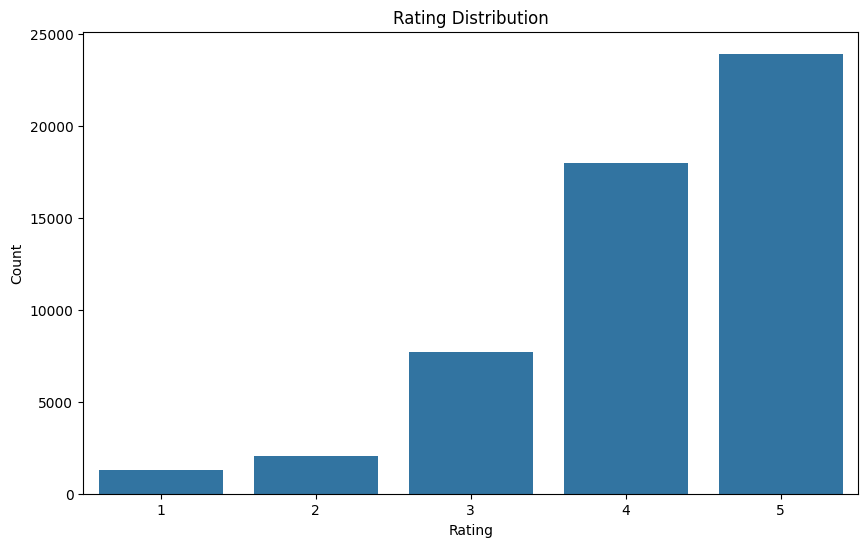

In [26]:
#chart-2
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', data=df)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

1.Why did you pick the specific chart?

Countplot is perfect for discrete integer values (1–5),It shows exact number of observations per rating.



2. What is/are the insight(s) found from the chart?

Rating 4,5 are highest count

very small count 1 and 2

This confirms rating imbalance.

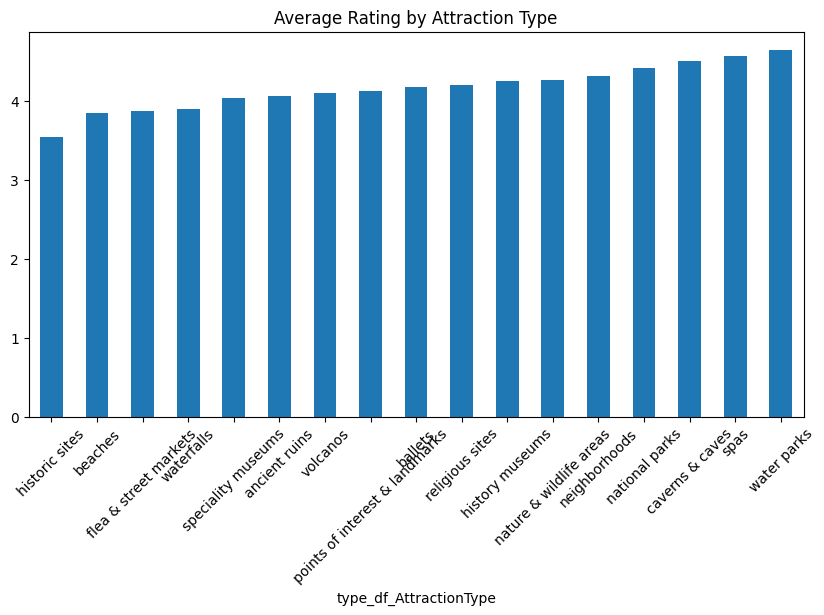

In [27]:
#chart-3
plt.figure(figsize=(10,5))
df.groupby('type_df_AttractionType')['Rating'].mean().sort_values().plot(kind='bar')
plt.title("Average Rating by Attraction Type")
plt.xticks(rotation=45)
plt.show()


1.Why did you pick the specific chart?

Bar chart is ideal for comparing averages across categories.

2.What is/are the insight(s) found from the chart?



->Some types have higher average rating

->Some types consistently lower

This means:

Type of attraction influences satisfaction

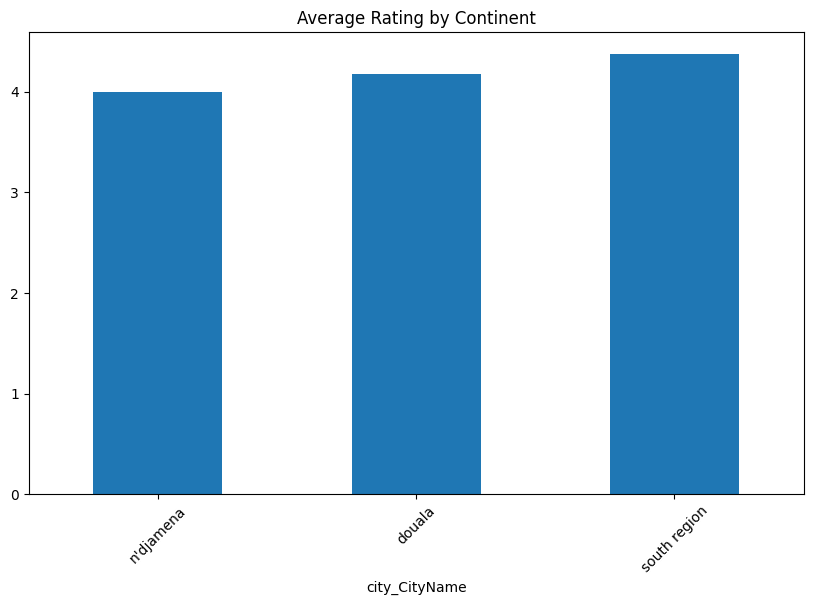

In [28]:
#chart-4
plt.figure(figsize=(10,6))
df.groupby('city_CityName')['Rating'].mean().sort_values().plot(kind='bar')
plt.title("Average Rating by Continent")
plt.xticks(rotation=45)
plt.show()

1.Why did you pick the specific chart?

->To analyze geographical influence.

->City-level comparison shows:

2.What is/are the insight(s) found from the chart?

-> All the three city have higher rating

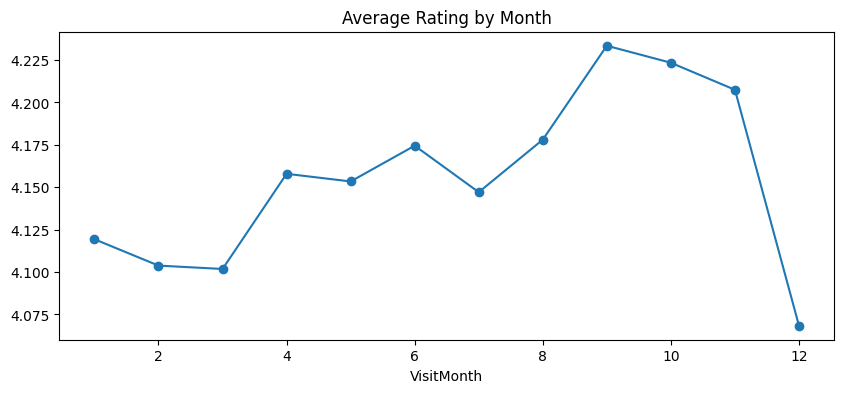

In [29]:
#chart-5
plt.figure(figsize=(10,4))
df.groupby('VisitMonth')['Rating'].mean().plot(kind='line', marker='o')
plt.title("Average Rating by Month")
plt.show()


1.Why did you pick the specific chart?

->Line chart is best for time/sequence analysis.

->VisitMonth is ordered (1–12).

2.What is/are the insight(s) found from the chart?

->Sudden fall in winter season(10-12)months

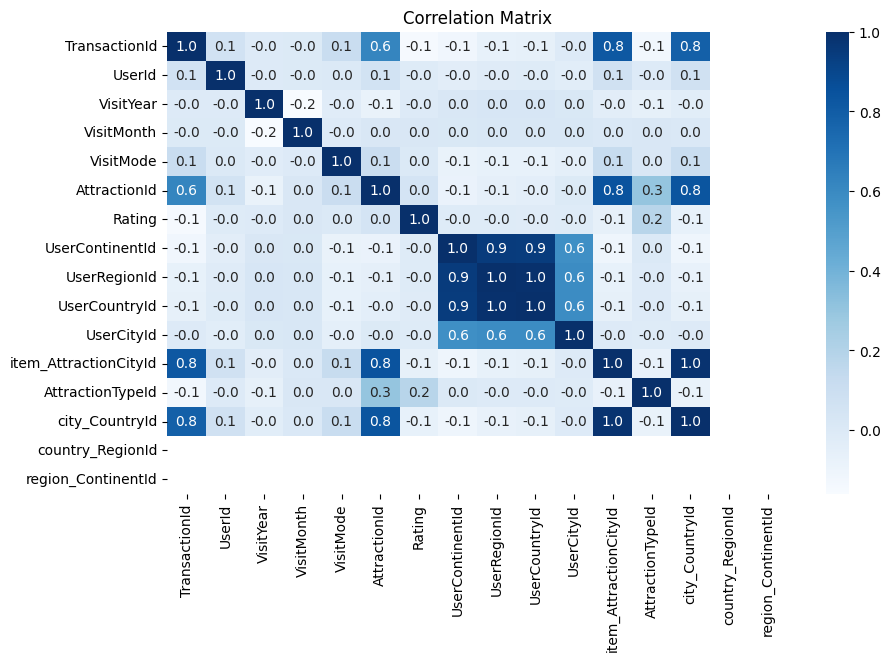

In [30]:
#chart-6
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap= 'Blues', fmt= '.1f')
plt.title("Correlation Matrix")
plt.show()


1.Why did you pick the specific chart?

Heatmap helps identify:


*   Relationship between numeric variables
*   Multicollinearity

*   Which features correlate with Rating






2.What is/are the insight(s) found from the chart?

Categorical variables likely influence rating more than numeric ones

# Converting the final Dataset to a CSV file

In [31]:
df.to_csv("final_merged_dataset.csv", index=False)

# Regression

##**Select Features and Target**

In [32]:
#target
y=df['Rating']

#features
X=df[['UserContinentId',
        'UserRegionId',
        'VisitYear',
        'VisitMonth',
        'VisitMode',
        'type_df_AttractionType']]

**Train-Test Split**

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y , test_size=0.2, random_state=42)



**Define Categorical & Numerical Columns**

In [34]:
categorical_cols = ['UserContinentId',
                    'UserRegionId',
                    'VisitMode',
                    'type_df_AttractionType']

numerical_cols = ['VisitYear',
                  'VisitMonth']

**Apply OneHotEncoding**

In [35]:
from sklearn.preprocessing import OneHotEncoder

encode=OneHotEncoder(drop='first',sparse_output=False)

#fit on training data
X_train_cat= encode.fit_transform(X_train[categorical_cols])

#transform test data
X_test_cat= encode.transform(X_test[categorical_cols])

In [36]:
#combining encoded + numerical columns

import numpy as np

X_train_final = np.concatenate(
    [X_train_cat, X_train[numerical_cols].values],
    axis=1
)

X_test_final = np.concatenate(
    [X_test_cat, X_test[numerical_cols].values],
    axis=1
)

**ML Model**

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_final, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test_final)

In [39]:
y_pred

array([4.241896  , 4.61420856, 4.22101841, ..., 3.83299052, 3.87760371,
       3.8654302 ])

# **Evaluation**

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.7342778677236438
RMSE: 0.9382881448367982
R2 Score: 0.0734012875953669


**ML MODEL-2**

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_final, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [42]:
y_pred_rf = rf_model.predict(X_test_final)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest MAE: 0.7664438891726809
Random Forest RMSE: 0.9974405707623444
Random Forest R2: -0.04711237546332092


In [44]:
# @title
# # ML Model - Random Forest with Hyperparameter Optimization (GridSearchCV)

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# param_grid_rf = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5]
# }

# grid_rf = GridSearchCV(
#     estimator=RandomForestRegressor(random_state=42),
#     param_grid=param_grid_rf,
#     cv=5,
#     scoring='r2',
#     n_jobs=-1
# )

# # Fit the Algorithm
# grid_rf.fit(X_train_final, y_train)

# # Best model
# best_rf_model = grid_rf.best_estimator_

# # Predict on the model
# y_pred_rf_opt = best_rf_model.predict(X_test_final)

# from sklearn.metrics import r2_score

# print('Best Parameters:', grid_rf.best_params_)
# print('Best CV Score:', grid_rf.best_score_)
# print('Test R2 Score:', r2_score(y_test, y_pred_rf_opt))

**Explain the ML Model used and its performance using Evaluation Metric**

I implemented Linear Regression and Random Forest Regressor to predict the target variable. Based on evaluation metrics, Linear Regression performed better, achieving MAE = 0.734, RMSE = 0.938, and R² = 0.073. In contrast, Random Forest showed higher errors and a negative R² (-0.047), indicating poor generalization. Therefore, Linear Regression is the better model for this dataset.

**Which hyperparameter optimization technique have you used and why?**

We used GridSearchCV for hyperparameter tuning. It systematically tests all possible combinations of selected hyperparameters using cross-validation

**Explain each evaluation metric used?**

MAE (Mean Absolute Error): Measures the average absolute difference between actual and predicted values. Lower MAE indicates better model accuracy.

RMSE (Root Mean Squared Error): Measures the square root of average squared errors. It penalizes larger errors more than MAE, making it useful for detecting large prediction mistakes.

R² Score (Coefficient of Determination): Indicates how well the model explains variance in the target variable. Higher R² is better; negative R² means the model performs worse than predicting the mean.

##**Classification**

In [50]:
y = df['VisitMode'] #target
X = df.drop('VisitMode', axis=1) # features

**One-Hot Encoding**

In [51]:
# Convert categorical columns into dummy variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42
)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))

print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.4281530467642891
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       135
           2       0.44      0.89      0.59      4337
           3       0.62      0.09      0.16      2995
           4       0.30      0.17      0.22      2190
           5       0.00      0.00      0.00       928

    accuracy                           0.43     10585
   macro avg       0.27      0.23      0.19     10585
weighted avg       0.42      0.43      0.33     10585



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.4992914501653283
              precision    recall  f1-score   support

           1       0.62      0.25      0.36       135
           2       0.52      0.71      0.60      4337
           3       0.50      0.48      0.49      2995
           4       0.41      0.26      0.31      2190
           5       0.52      0.18      0.27       928

    accuracy                           0.50     10585
   macro avg       0.51      0.38      0.41     10585
weighted avg       0.49      0.50      0.48     10585



I  implemented Logistic Regression and Random Forest Classifier to predict the user visit mode. Logistic Regression achieved an accuracy of 42.8%, but it heavily predicted class 2 (high recall = 0.89) and failed to identify minority classes (class 1 and 5 with 0 recall). Random Forest performed better with 49.9% accuracy, showing more balanced precision, recall, and F1-scores across classes. The macro and weighted averages are also higher for Random Forest, indicating better overall class-wise performance. Therefore, Random Forest is the better-performing model for this classification task

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52922 entries, 0 to 52929
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   TransactionId            52922 non-null  int64 
 1   UserId                   52922 non-null  int64 
 2   VisitYear                52922 non-null  int64 
 3   VisitMonth               52922 non-null  int64 
 4   VisitMode                52922 non-null  int64 
 5   AttractionId             52922 non-null  int64 
 6   Rating                   52922 non-null  int64 
 7   UserContinentId          52922 non-null  int64 
 8   UserRegionId             52922 non-null  int64 
 9   UserCountryId            52922 non-null  int64 
 10  UserCityId               52922 non-null  int64 
 11  item_AttractionCityId    52922 non-null  int64 
 12  AttractionTypeId         52922 non-null  int64 
 13  item_Attraction          52922 non-null  object
 14  item_AttractionAddress   52922 non-null  ob

## **Recommendations: Personalized Attraction Suggestions**

In [57]:
#creating user item metrix
user_item_matrix = df.pivot_table(
    index='UserId',
    columns='AttractionId',
    values='Rating'
)

user_item_filled = user_item_matrix.fillna(0)

In [58]:
user_item_matrix.head()

AttractionId,369,481,640,650,673,737,748,749,824,841,...,1133,1137,1166,1171,1220,1225,1238,1278,1280,1297
UserId,,,,,,,,,,,,,,,,,,,,,
14,NaN,NaN,4.00,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,5.0,4.25,NaN,NaN,NaN,5.0,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_filled)

# convert to dataframe
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item_filled.index,
    columns=user_item_filled.index
)

user_similarity_df.head()

UserId,14,16,20,23,25,26,27,28,29,32,...,88168,88170,88175,88177,88178,88179,88185,88187,88189,88190
UserId,,,,,,,,,,,,,,,,,,,,,
14,1.000000,0.603672,0.000000,0.780869,0.0,0.780869,0.624695,0.0,0.624695,0.624695,...,0.624695,0.404029,0.624695,0.624695,0.624695,0.780869,0.327429,0.000000,0.499756,0.780869
16,0.603672,1.000000,0.460165,0.460165,0.0,0.460165,0.391141,0.0,0.391141,0.391141,...,0.391141,0.252975,0.391141,0.391141,0.391141,0.460165,0.578861,0.460165,0.312913,0.460165
20,0.000000,0.460165,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.314485,0.000000,0.000000,0.000000
23,0.780869,0.460165,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.419314,0.000000,0.000000,1.000000
25,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [60]:
#Find Similar Users
def get_similar_users(user_id, top_n=5):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(user_id)  # remove self
    return similar_users.head(top_n)

get_similar_users(14)

,14
UserId,
14058,1.0
34230,1.0
53211,1.0
83585,1.0
20722,1.0


In [61]:
#Recommend Attractions
def recommend_attractions(user_id, top_n_users=5, top_n_recommendations=5):

    similar_users = get_similar_users(user_id, top_n_users)

    # Attractions already rated by target user
    user_rated = user_item_matrix.loc[user_id].dropna().index

    # Get ratings from similar users
    similar_users_ratings = user_item_matrix.loc[similar_users.index]

    # Average rating for each attraction
    recommendation_scores = similar_users_ratings.mean().sort_values(ascending=False)

    # Remove already rated attractions
    recommendation_scores = recommendation_scores.drop(user_rated, errors='ignore')

    top_attractions = recommendation_scores.head(top_n_recommendations).index

    return top_attractions

In [62]:
recommend_attractions(14)

Index([369, 481, 650, 673, 737], dtype='int64', name='AttractionId')

In [63]:
#Attach Attraction Details
def get_recommendation_details(user_id):

    recommended_ids = recommend_attractions(user_id)

    details = df[df['AttractionId'].isin(recommended_ids)][[
        'AttractionId',
        'item_Attraction',
        'item_AttractionAddress',
        'city_CityName',
        'country_CountryName'
    ]].drop_duplicates().reset_index(drop=True)

    return details

get_recommendation_details(14)

,AttractionId,item_Attraction,item_AttractionAddress,city_CityName,country_CountryName
0,673,seminyak beach,seminyak,douala,cameroon
1,481,nusa dua beach,"semenanjung nusa dua, nusa dua 80517 indonesia",douala,cameroon
2,650,sanur beach,sanur,douala,cameroon
3,737,tanah lot temple,"kecamatan kediri, kabupaten tabanan, beraban 8...",douala,cameroon
4,369,kuta beach - bali,kuta,douala,cameroon


# Dataset for the Streamlit app

In [65]:
df.to_csv("final_df.csv", index=False)